In [1]:
#Import Depend
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import Data

df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [3]:
sdf = df.drop(df.columns[[0, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17]], axis=1)
sdf.head(10)

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3,30,5
1,20.34,0,0,7
2,26.58,20,30,8
3,24.21,0,0,6
4,23.71,28,0,8
5,28.87,6,0,12
6,21.63,15,0,4
7,31.64,5,0,9
8,26.45,0,0,5
9,40.69,0,0,10


In [4]:
#Create the X variables
X = sdf.drop(['BMI'], axis=1)

In [5]:
#Create the y variable "HeartDisease"
y = sdf['BMI']

In [6]:
# Data split for performance testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Linear Reggresion 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
#model prediction 
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [9]:
#test performance 
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [10]:
print(lr_train_mse)

39.87810689560155


In [11]:
print(lr_train_r2)

0.015159497216841178


In [12]:
print(lr_test_mse)

39.46789762973303


In [13]:
print(lr_test_r2)

0.014064333233043791


In [14]:
lr_results = pd.DataFrame([lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()

In [15]:
#Random forest 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=42)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [16]:
#RF Prediction

y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [18]:
rf_results = pd.DataFrame([rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()

In [19]:
pd.concat([lr_results, rf_results])

,0,1,2,3
0,39.878107,0.015159,39.467898,0.014064
0,39.740874,0.018549,39.283331,0.018675


Text(0.5, 0, 'Experimental LogS')

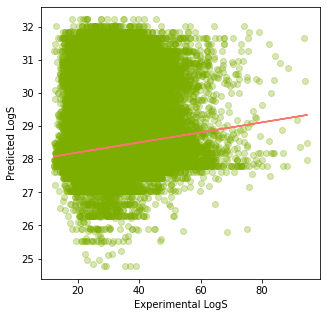

In [20]:
#plot the results 
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')